<a href="https://colab.research.google.com/github/carlosdan8co/IntroToGEODataFrames/blob/master/IntroToGEODataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [44]:
# Clone github repository setup
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Python/Github' 
# replace with your Github username 
GIT_USERNAME = "carlosdan8co" 
# definitely replace with your
GIT_TOKEN = "{KEY}"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "IntroToGEODataFrames" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path 
!mkdir "{PROJECT_PATH}"    

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive/My Drive/Python/Github
mkdir: cannot create directory ‘/content/drive/My Drive/Python/Github’: File exists
GIT_PATH:  https://{KEY}@github.com/carlosdan8co/IntroToGEODataFrames.git


In [46]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 18.2MB/s 
     |████████████████████████████████| 14.7MB 302kB/s 


In [47]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [48]:
states=gpd.read_file('states/destdv250k_2cw.shp')

In [52]:
states.columns

Index(['AREA', 'PERIMETER', 'COV_', 'COV_ID', 'ENTIDAD', 'CAPITAL',
       'RASGO_GEOG', 'NUM_EDO', 'geometry'],
      dtype='object')

In [53]:
states.head()

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry
0,7.168906e+10,2.279617e+06,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((1074506.248 2330373.415, 1074542.436..."
1,4.778331e+05,3.517358e+03,3,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((1054502.524 2340181.163, 1054435.523..."
2,4.242921e+04,9.162551e+02,4,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((1057339.163 2338672.912, 1057314.350..."
3,1.297597e+05,2.259749e+03,5,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((1057559.166 2337684.659, 1057524.478..."
4,1.479779e+06,7.917770e+03,6,6,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((1059151.991 2334815.901, 1059113.928..."


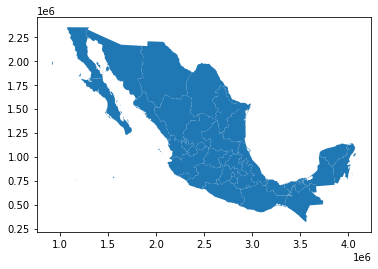

In [50]:
states.plot()

In [57]:
states['ENTIDAD'].unique()

array(['BAJA CALIFORNIA', 'SONORA', 'CHIHUAHUA', 'COAHUILA DE ZARAGOZA',
       'BAJA CALIFORNIA SUR', 'NUEVO LEON', 'TAMAULIPAS', 'SINALOA',
       'DURANGO', 'ZACATECAS', 'SAN LUIS POTOSI', 'NAYARIT', 'JALISCO',
       'VERACRUZ DE IGNACIO DE LA LLAVE', 'AGUASCALIENTES',
       'QUINTANA ROO', 'YUCATAN', 'GUANAJUATO', 'QUERETARO DE ARTEAGA',
       'CAMPECHE', 'HIDALGO', 'PUEBLA', 'MICHOACAN DE OCAMPO', 'MEXICO',
       'TLAXCALA', 'DISTRITO FEDERAL', 'COLIMA', 'MORELOS', 'TABASCO',
       'GUERRERO', 'OAXACA', 'CHIAPAS'], dtype=object)

In [58]:
is_Jalisco =  states['ENTIDAD']=='JALISCO'
is_Jalisco.head()

0    False
1    False
2    False
3    False
4    False
Name: ENTIDAD, dtype: bool

In [60]:
stateJalisco=states[is_Jalisco]
stateJalisco.shape

(23, 9)

In [61]:
stateJalisco.head()

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry
785,7.796039e+10,3.638383e+06,787,784,JALISCO,Guadalajara,None,14,"POLYGON ((2319138.321 1190015.551, 2319144.571..."
878,1.899474e+04,6.549044e+02,880,875,JALISCO,None,ISLA,14,"POLYGON ((2158058.226 952619.236, 2158014.976 ..."
879,3.353069e+03,2.128390e+02,881,876,JALISCO,None,ISLA,14,"POLYGON ((2158285.727 952618.236, 2158263.852 ..."
918,4.891852e+03,2.620654e+02,920,885,JALISCO,None,ISLA,14,"POLYGON ((2150618.146 867193.758, 2150574.521 ..."
921,2.274737e+04,6.962042e+02,923,903,JALISCO,None,ISLA,14,"POLYGON ((2170810.373 845929.127, 2170803.248 ..."


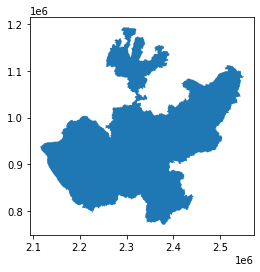

In [62]:
stateJalisco.plot()

In [63]:
stateJalisco['RASGO_GEOG'].unique()

array([None, 'ISLA'], dtype=object)

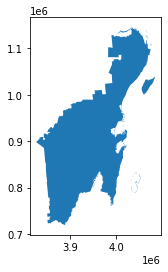

In [64]:
states[states['ENTIDAD']=='QUINTANA ROO'].plot()